In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\noufi\Downloads\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

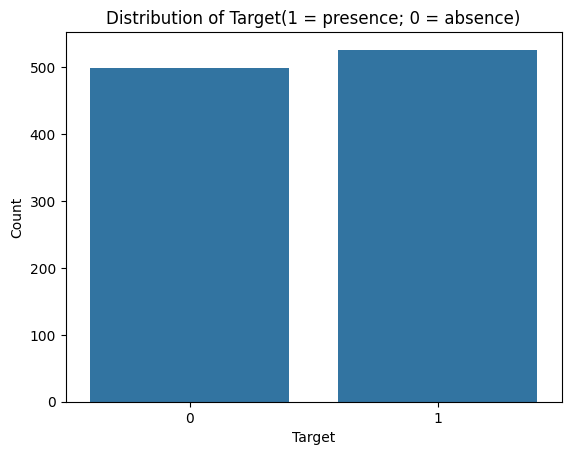

In [7]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Target(1 = presence; 0 = absence)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [8]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: count, dtype: int64

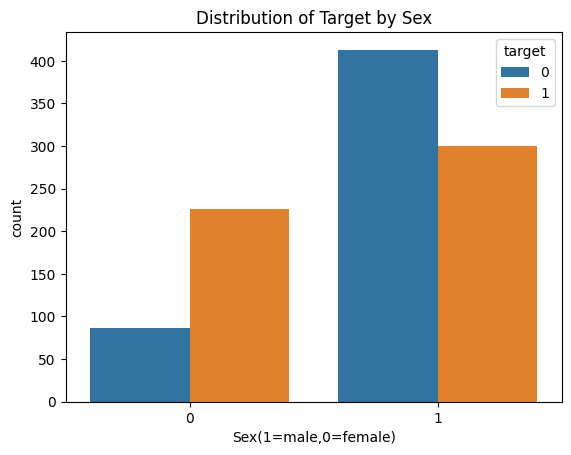

In [9]:
sns.countplot(x='sex',hue ='target', data=data)
plt.title('Distribution of Target by Sex')
plt.xlabel('Sex(1=male,0=female)')
plt.show()

In [31]:
data.groupby('cp')['target'].value_counts()

cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: count, dtype: int64

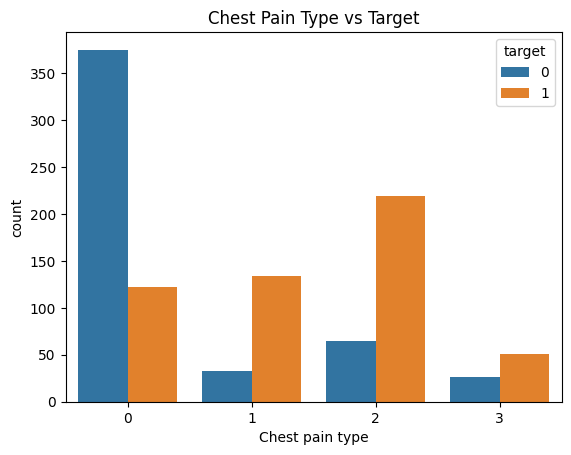

In [10]:
sns.countplot(x="cp", hue="target", data=data)
plt.xlabel('Chest pain type')
plt.title("Chest Pain Type vs Target")
plt.show()

In [32]:
data.groupby('fbs')['target'].value_counts()

fbs  target
0    1         455
     0         417
1    0          82
     1          71
Name: count, dtype: int64

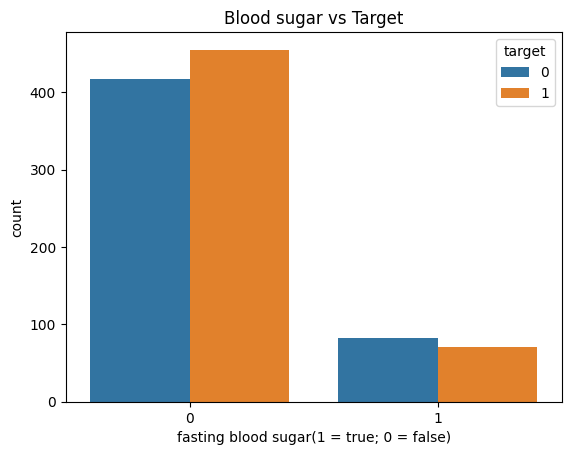

In [11]:
sns.countplot(x="fbs", hue="target", data=data)
plt.xlabel('fasting blood sugar(1 = true; 0 = false)')
plt.title("Blood sugar vs Target")
plt.show()

In [33]:
data.groupby('exang')['target'].value_counts()

exang  target
0      1         455
       0         225
1      0         274
       1          71
Name: count, dtype: int64

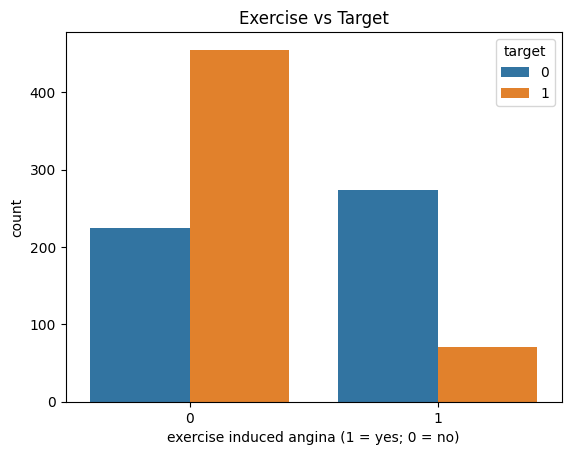

In [12]:
sns.countplot(x="exang", hue="target", data=data)
plt.xlabel('exercise induced angina (1 = yes; 0 = no)')
plt.title("Exercise vs Target")
plt.show()


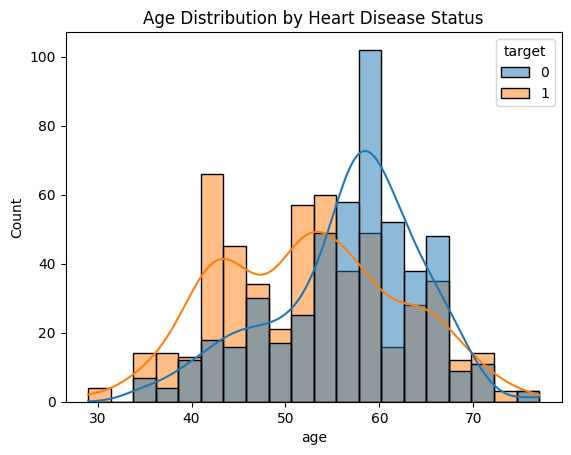

In [35]:
sns.histplot(data=data, x="age", bins=20, hue="target", kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.show()

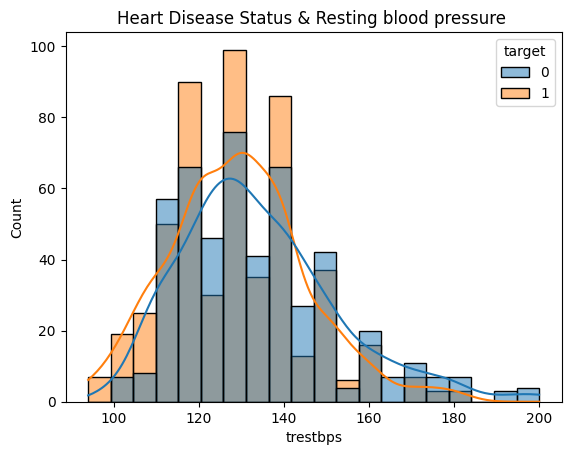

In [37]:
sns.histplot(data=data, x="trestbps", bins=20, hue="target", kde=True)
plt.title("Heart Disease Status & Resting blood pressure ")
plt.show()

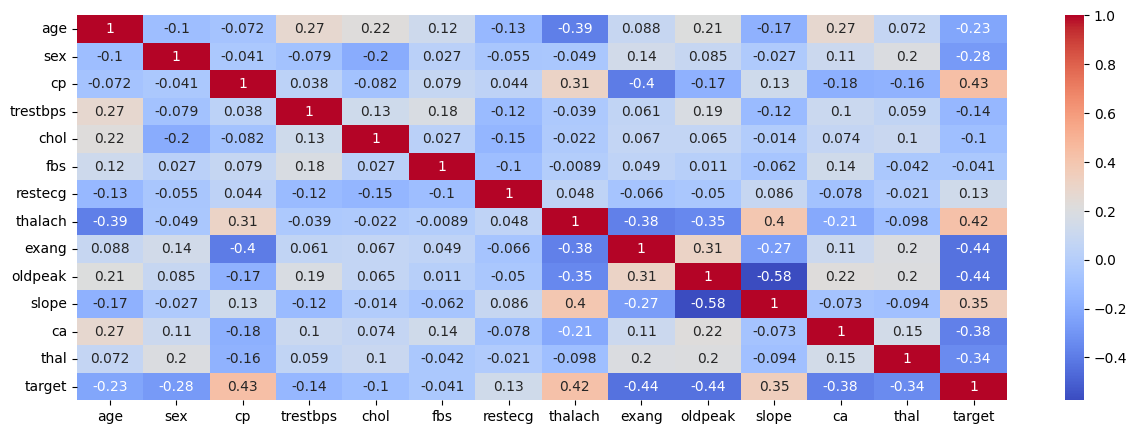

In [14]:
plt.figure(figsize=(15,5))
corr = data.corr()
sns.heatmap(corr,annot =True,cmap='coolwarm')
plt.show()

In [15]:
X = data.drop('target',axis=1)
y = data['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [17]:
# Decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


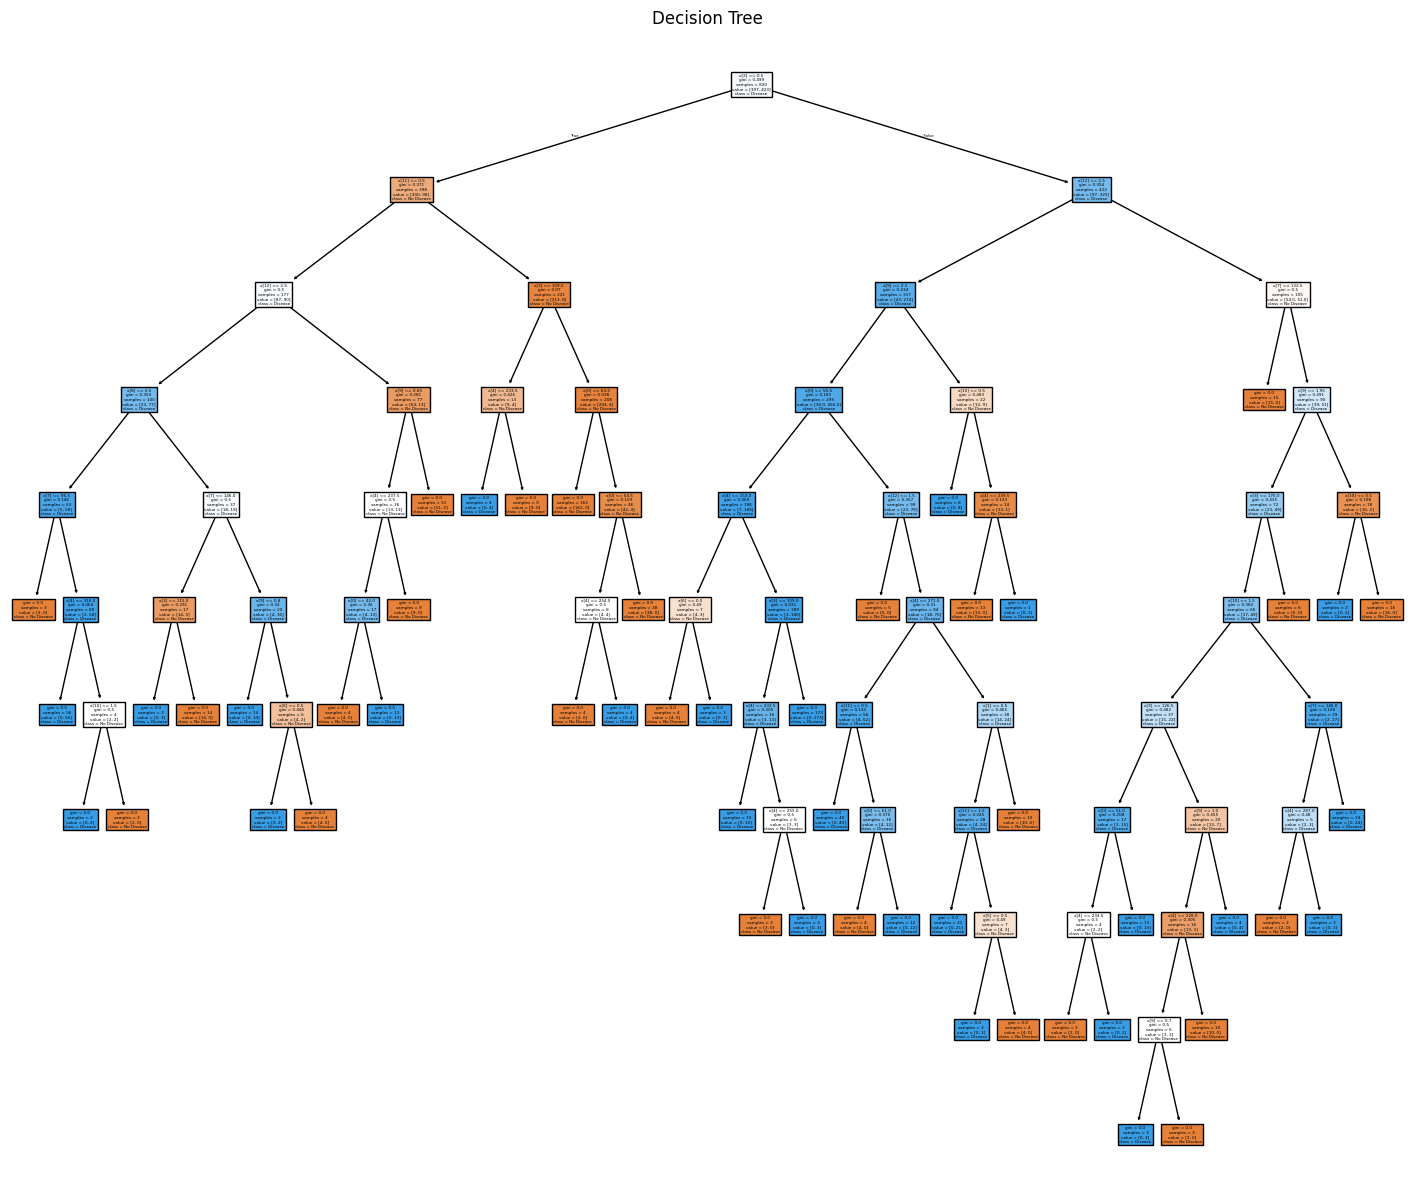

In [18]:
plt.figure(figsize=(18,15))
plot_tree(dtree, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

In [19]:
dttrain_acc = accuracy_score(y_train, dtree.predict(X_train))
dttest_acc = accuracy_score(y_test, dtree.predict(X_test))
print("DT train accuracy :",dttrain_acc)
print("DT test accuracy :", dttest_acc)

DT train accuracy : 1.0
DT test accuracy : 0.9853658536585366


In [20]:
y_pred = dtree.predict(X_test)

In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[102   0]
 [  3 100]]


In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [23]:
for depth in range(1, 11):
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, dtree.predict(X_train))
    test_acc = accuracy_score(y_test, dtree.predict(X_test))
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")


Max Depth: 1, Train Accuracy: 0.762, Test Accuracy: 0.751
Max Depth: 2, Train Accuracy: 0.770, Test Accuracy: 0.678
Max Depth: 3, Train Accuracy: 0.851, Test Accuracy: 0.780
Max Depth: 4, Train Accuracy: 0.883, Test Accuracy: 0.800
Max Depth: 5, Train Accuracy: 0.929, Test Accuracy: 0.844
Max Depth: 6, Train Accuracy: 0.949, Test Accuracy: 0.883
Max Depth: 7, Train Accuracy: 0.973, Test Accuracy: 0.917
Max Depth: 8, Train Accuracy: 0.990, Test Accuracy: 0.976
Max Depth: 9, Train Accuracy: 0.996, Test Accuracy: 0.980
Max Depth: 10, Train Accuracy: 1.000, Test Accuracy: 0.985


In [24]:
# tree is still not overfitting at max depth 10.

In [25]:
# Limit max depth to, say, 4
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
limited_test_acc = accuracy_score(y_test, dt_limited.predict(X_test))
limited_test_acc

0.8

In [26]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
rftrain_acc = rf.score(X_train, y_train)
rftest_acc = rf.score(X_test, y_test)

print("RF Train Accuracy:", rftrain_acc)
print("RF Test Accuracy:", rftest_acc)

RF Train Accuracy: 1.0
RF Test Accuracy: 0.9853658536585366


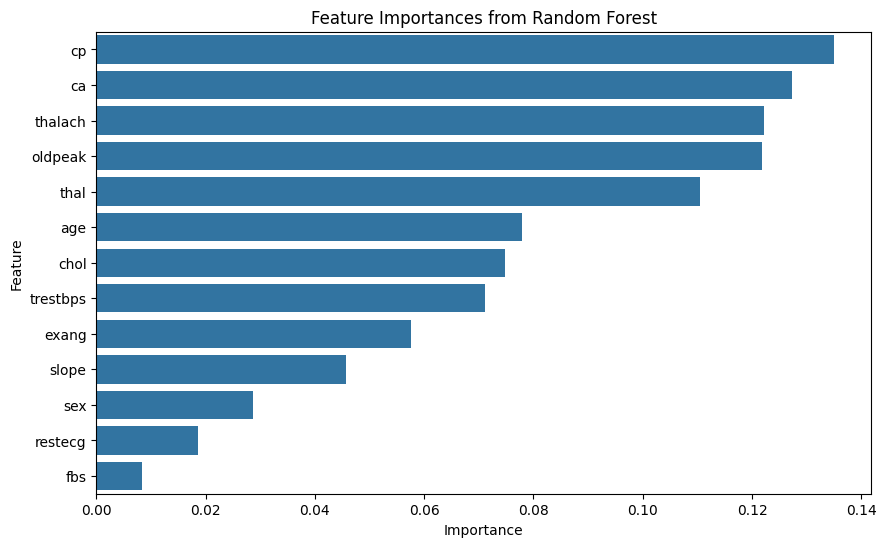

In [28]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
dt_scores = cross_val_score(dt_limited, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy (max_depth=4):", dt_scores.mean())
print("Random Forest CV Accuracy:", rf_scores.mean())

Decision Tree CV Accuracy (max_depth=4): 0.8341463414634147
Random Forest CV Accuracy: 0.9970731707317073
